In [33]:
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
# Read the output file #
df = pd.read_csv("outputs/hercules_output.csv", index_col=False)
df.head()

,dt,hercules_comms.amr_wind.wind_farm_0.num_turbines,hercules_comms.amr_wind.wind_farm_0.rotor_diameter,hercules_comms.amr_wind.wind_farm_0.turbine_powers.000,hercules_comms.amr_wind.wind_farm_0.turbine_powers.001,hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000,hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001,hercules_comms.amr_wind.wind_farm_0.wind_direction,hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind,hercules_comms.amr_wind.wind_farm_0.wind_speed,...,py_sims.solar_farm_0.elev,py_sims.solar_farm_0.initial_conditions.power,py_sims.solar_farm_0.initial_conditions.dni,py_sims.solar_farm_0.outputs.power_mw,py_sims.solar_farm_0.outputs.dni,py_sims.solar_farm_0.outputs.aoi,py_sims.inputs.available_power,py_sims.inputs.sim_time_s,time,clock_time
0,100.0,2,126.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,1829,25,1000,35.272578,651.343,47.926054,0.000000,0.0,100.0,2024-07-10 16:37:21.356152
1,100.0,2,126.0,2227.047236,2221.531399,240.0,240.0,240.0,199.0,8.0,...,1829,25,1000,61.736643,739.579,34.737138,4448.578635,199.0,200.0,2024-07-10 16:37:24.476314
2,100.0,2,126.0,2227.047236,2221.531399,240.0,240.0,240.0,299.0,8.0,...,1829,25,1000,74.147385,870.718,21.393495,4448.578635,299.0,300.0,2024-07-10 16:37:27.789139
3,100.0,2,126.0,2227.047236,2221.531399,240.0,240.0,240.0,399.0,8.0,...,1829,25,1000,74.463662,906.835,8.332755,4448.578635,399.0,400.0,2024-07-10 16:37:31.207554
4,100.0,2,126.0,2227.047236,2221.531399,240.0,240.0,240.0,499.0,8.0,...,1829,25,1000,9.232213,0.000,5.947254,4448.578635,499.0,500.0,2024-07-10 16:37:34.323214


In [35]:
df.columns

Index(['dt', 'hercules_comms.amr_wind.wind_farm_0.num_turbines',
       'hercules_comms.amr_wind.wind_farm_0.rotor_diameter',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_powers.001',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_wind_directions.001',
       'hercules_comms.amr_wind.wind_farm_0.wind_direction',
       'hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind',
       'hercules_comms.amr_wind.wind_farm_0.wind_speed',
       'hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.000',
       'hercules_comms.amr_wind.wind_farm_0.turbine_yaw_angles.001',
       'hercules_comms.helics.config.use_dash_frontend',
       'hercules_comms.helics.config.KAFKA',
       'hercules_comms.helics.config.helics.helicsport',
       'hercules_comms.helics.config.helics.deltat',
       'hercules_comms.helics.config.publication_interval',
  

Text(0.5, 0, 'time [hr]')

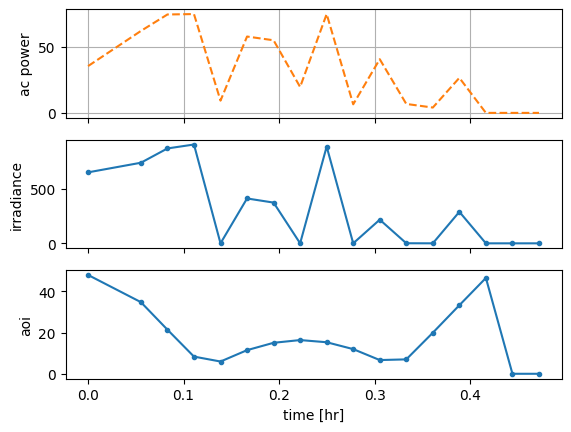

In [36]:
# first test solar module outputs
time = df["hercules_comms.amr_wind.wind_farm_0.sim_time_s_amr_wind"]

if "external_signals.solar_power_reference_mw" in df.columns:
    power_setpoint = df["external_signals.solar_power_reference_mw"]
ac_power = df["py_sims.solar_farm_0.outputs.power_mw"]
# dc_power = df["py_sims.solar_farm_0.outputs.dc_power_mw"]
aoi = df["py_sims.solar_farm_0.outputs.aoi"]
irradiance = df["py_sims.solar_farm_0.outputs.dni"]

fig, ax = plt.subplots(3, 1, sharex="col")  # , figsize=[6,5], dpi=250)

if "external_signals.solar_power_reference_mw" in df.columns:
    ax[0].plot(time / 3600, power_setpoint, "-", linewidth=1, label='setpoint', color="C0")
ax[0].plot(time / 3600, ac_power, "--", label="power", color="C1")
ax[0].set_ylabel("ac power")
ax[0].grid()
# ax[0].legend()

# ax[1].plot(time / 3600, dc_power, ".-", label="dc power")
# ax[1].set_ylabel("dc power")

ax[1].plot(time / 3600, irradiance, ".-", label="irradiance")
ax[1].set_ylabel("irradiance")
# ax[1].legend()

ax[2].plot(time / 3600, aoi, ".-", label="aoi")
ax[2].set_ylabel("aoi")
ax[-1].set_xlabel("time [hr]")

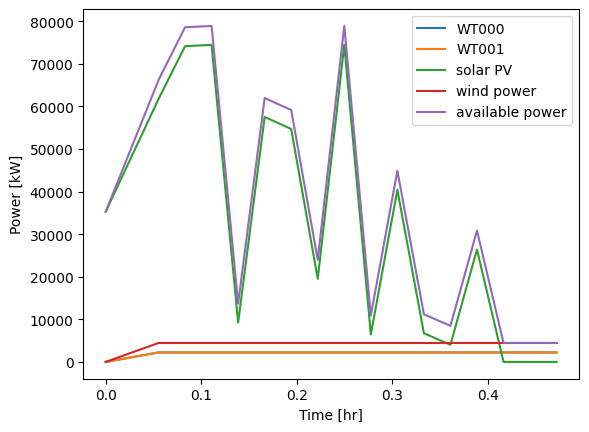

In [37]:
plt.figure()
plt.plot(time / 3600, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.000"], label="WT000")
plt.plot(time / 3600, df["hercules_comms.amr_wind.wind_farm_0.turbine_powers.001"], label="WT001")
plt.plot(time / 3600, df["py_sims.solar_farm_0.outputs.power_mw"]*1000, label="solar PV")
plt.plot(time / 3600, df["py_sims.inputs.available_power"], label="wind power")
plt.plot(time / 3600, df["py_sims.inputs.available_power"]+\
    df["py_sims.solar_farm_0.outputs.power_mw"]*1000, label="available power")
plt.ylabel("Power [kW]")
plt.xlabel("Time [hr]")
plt.legend()